In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
#import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [71]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data_main = pd.read_csv(
    './datasets/tradingview/bitcoin/BTCUSD_1D_to_2023-03-11.csv',
    delimiter=',',
    low_memory=False
)
data_main

,time,open,high,low,close,Histogram,MACD,Signal,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,OnBalanceVolume,Smoothing Line,ADX,NV
0,2009-10-05T04:00:00+04:00,0.000764,0.000764,0.000764,0.000764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-10-06T04:00:00+04:00,0.000885,0.000885,0.000885,0.000885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000
2,2009-10-07T04:00:00+04:00,0.001050,0.001050,0.001050,0.001050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000
3,2009-10-08T04:00:00+04:00,0.001084,0.001084,0.001084,0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000
4,2009-10-09T04:00:00+04:00,0.001200,0.001200,0.001200,0.001200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,2023-03-07T03:00:00+03:00,22415.570000,22552.120000,21927.510000,22201.830000,-238.134300,-109.924026,128.210274,41.678396,49.566643,NaN,NaN,7.408373e+06,7.426450e+06,22.036393,-15118.130417
4804,2023-03-08T03:00:00+03:00,22203.580000,22282.920000,21588.560000,21701.470000,-258.385641,-194.771777,63.613864,37.572144,48.014107,NaN,NaN,7.390680e+06,7.417858e+06,21.677303,-17693.066945
4805,2023-03-09T03:00:00+03:00,21699.330000,21842.130000,19858.830000,20346.900000,-344.559235,-367.085180,-22.525945,29.188244,46.027901,NaN,NaN,7.358888e+06,7.403712e+06,23.090552,-31792.011157
4806,2023-03-10T03:00:00+03:00,20349.670000,20350.450000,19559.360000,20222.680000,-388.230876,-507.814539,-119.583664,28.558888,44.464712,NaN,NaN,7.313238e+06,7.378934e+06,24.620602,-45649.645680


In [4]:
#DATE = 'Date'
TIME = 'time'
OPEN = 'open'
HIGH = 'high'
LOW = 'low'
CLOSE = 'close'
VOLUME = 'volume'
#MARKET_CAP = 'Market cap'

#INDICATORS
MOVING_AVERAGE = 'MA'
SMOOTHING_LINE = 'Smoothing Line'
HISTOGRAM = 'Histogram'
MACD = 'MACD'
SIGNAL = 'Signal'
RSI = 'RSI'
RSI_MA = 'RSI-based MA'
UP_BOL_BAND = 'Upper Bollinger Band'
LOW_BOL_BAND = 'Lower Bollinger Band'
OBV = 'OnBalanceVolume'
ADX = 'ADX'
NV = 'NV'

ALL_COLUMNS = {
    TIME, OPEN, HIGH, LOW, CLOSE,
    MOVING_AVERAGE, SMOOTHING_LINE, HISTOGRAM, MACD, SIGNAL, RSI, RSI_MA, UP_BOL_BAND, LOW_BOL_BAND, OBV, ADX
}

In [6]:
df = data_main[[TIME, OPEN, CLOSE, HIGH, LOW]]
df.head()

,time,open,close,high,low
0,2009-10-05T04:00:00+04:00,0.000764,0.000764,0.000764,0.000764
1,2009-10-06T04:00:00+04:00,0.000885,0.000885,0.000885,0.000885
2,2009-10-07T04:00:00+04:00,0.001050,0.001050,0.001050,0.001050
3,2009-10-08T04:00:00+04:00,0.001084,0.001084,0.001084,0.001084
4,2009-10-09T04:00:00+04:00,0.001200,0.001200,0.001200,0.001200


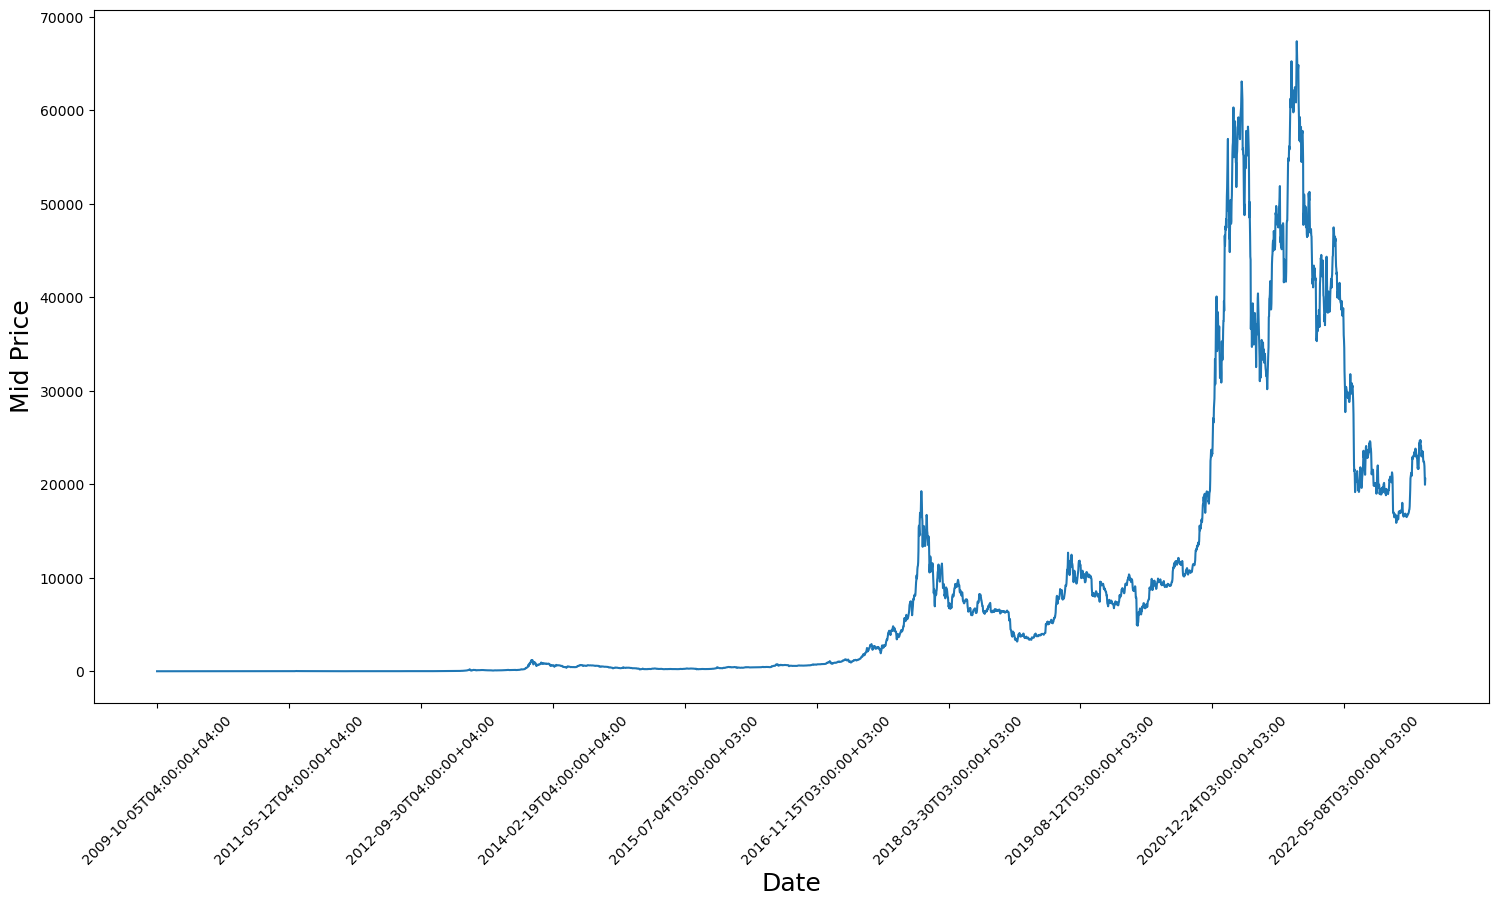

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df[LOW]+df[HIGH])/2.0)
plt.xticks(range(0,df.shape[0],500),df[TIME].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [23]:
df

,time,open,close,high,low
0,2009-10-05T04:00:00+04:00,0.000764,0.000764,0.000764,0.000764
1,2009-10-06T04:00:00+04:00,0.000885,0.000885,0.000885,0.000885
2,2009-10-07T04:00:00+04:00,0.001050,0.001050,0.001050,0.001050
3,2009-10-08T04:00:00+04:00,0.001084,0.001084,0.001084,0.001084
4,2009-10-09T04:00:00+04:00,0.001200,0.001200,0.001200,0.001200
...,...,...,...,...,...
4803,2023-03-07T03:00:00+03:00,22415.570000,22201.830000,22552.120000,21927.510000
4804,2023-03-08T03:00:00+03:00,22203.580000,21701.470000,22282.920000,21588.560000
4805,2023-03-09T03:00:00+03:00,21699.330000,20346.900000,21842.130000,19858.830000
4806,2023-03-10T03:00:00+03:00,20349.670000,20222.680000,20350.450000,19559.360000


In [33]:
data_main[[CLOSE]]

,close
0,0.000764
1,0.000885
2,0.001050
3,0.001084
4,0.001200
...,...
4803,22201.830000
4804,21701.470000
4805,20346.900000
4806,20222.680000


In [34]:
# high_prices = df.loc[:,HIGH].to_numpy()
# low_prices = df.loc[:,LOW].to_numpy()
mid_prices = data_main[[CLOSE]]
mid_prices

,close
0,0.000764
1,0.000885
2,0.001050
3,0.001084
4,0.001200
...,...
4803,22201.830000
4804,21701.470000
4805,20346.900000
4806,20222.680000


In [ ]:
train_data = mid_prices[:3500].to_numpy()
test_data = mid_prices[3500:].to_numpy()
train_data

In [47]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [48]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 800
for di in range(0,3200,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
train_data

In [50]:
train_data.shape

(3500, 1)

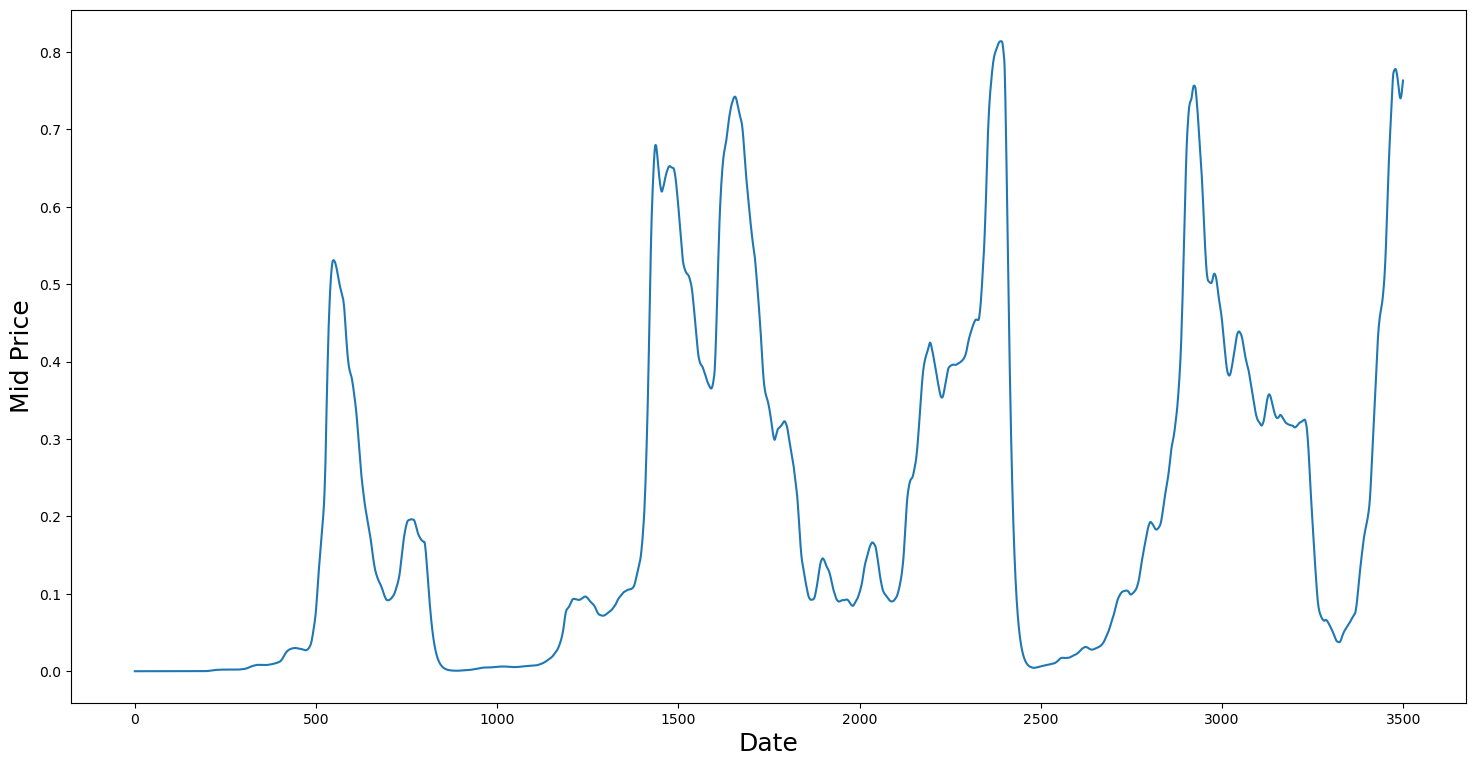

In [64]:
plt.figure(figsize = (18,9))
plt.plot(range(train_data.shape[0]), train_data)
#plt.xticks(range(0,df.shape[0],500),df[TIME].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [52]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [54]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(3500):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

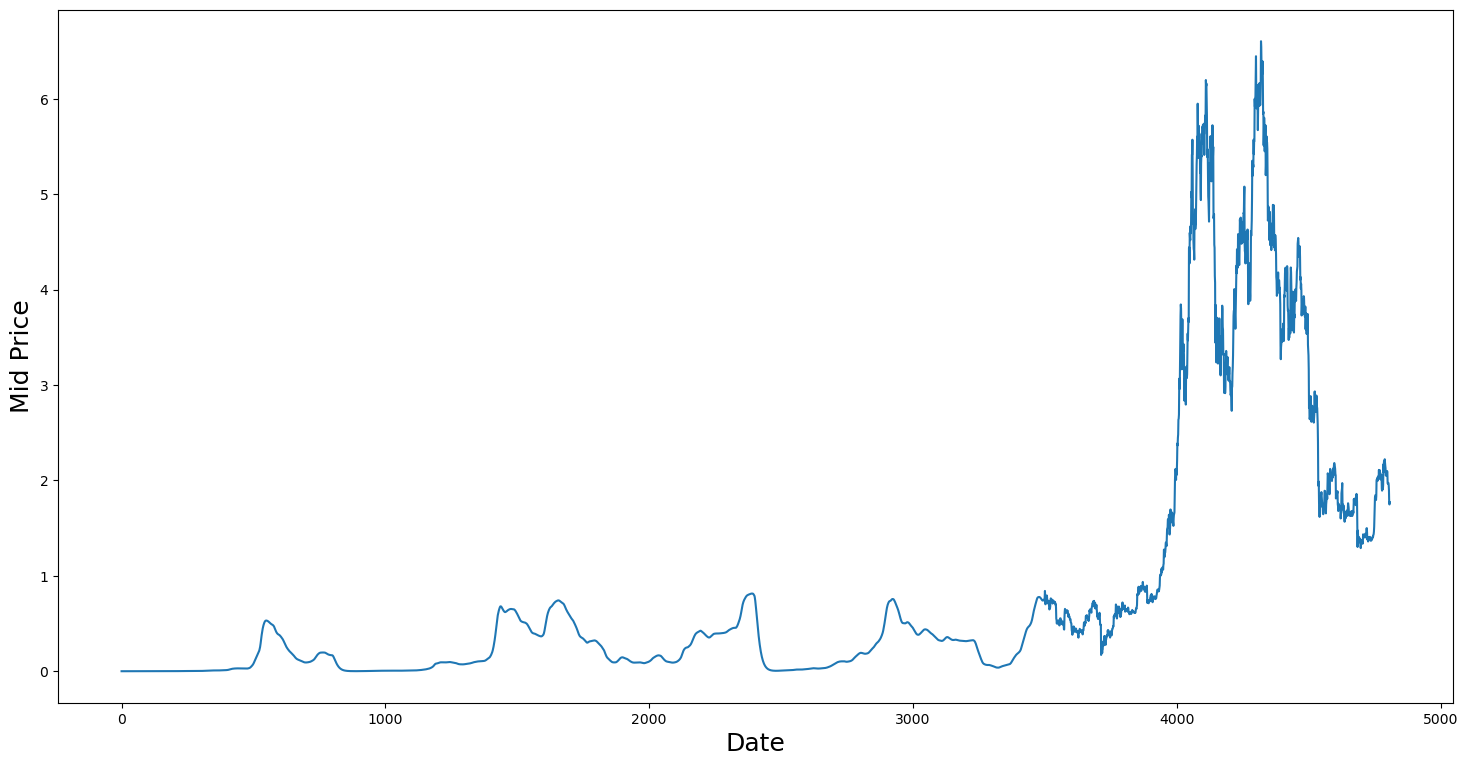

In [55]:
plt.figure(figsize = (18,9))
plt.plot(range(all_mid_data.shape[0]), all_mid_data)
#plt.xticks(range(0,df.shape[0],500),df[TIME].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [61]:
all_mid_data.max()

6.603993492929088

# Standard Average

In [57]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    # if pred_idx >= N:
    #     date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    # else:
    #     date = df.loc[pred_idx, 'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    #std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00954


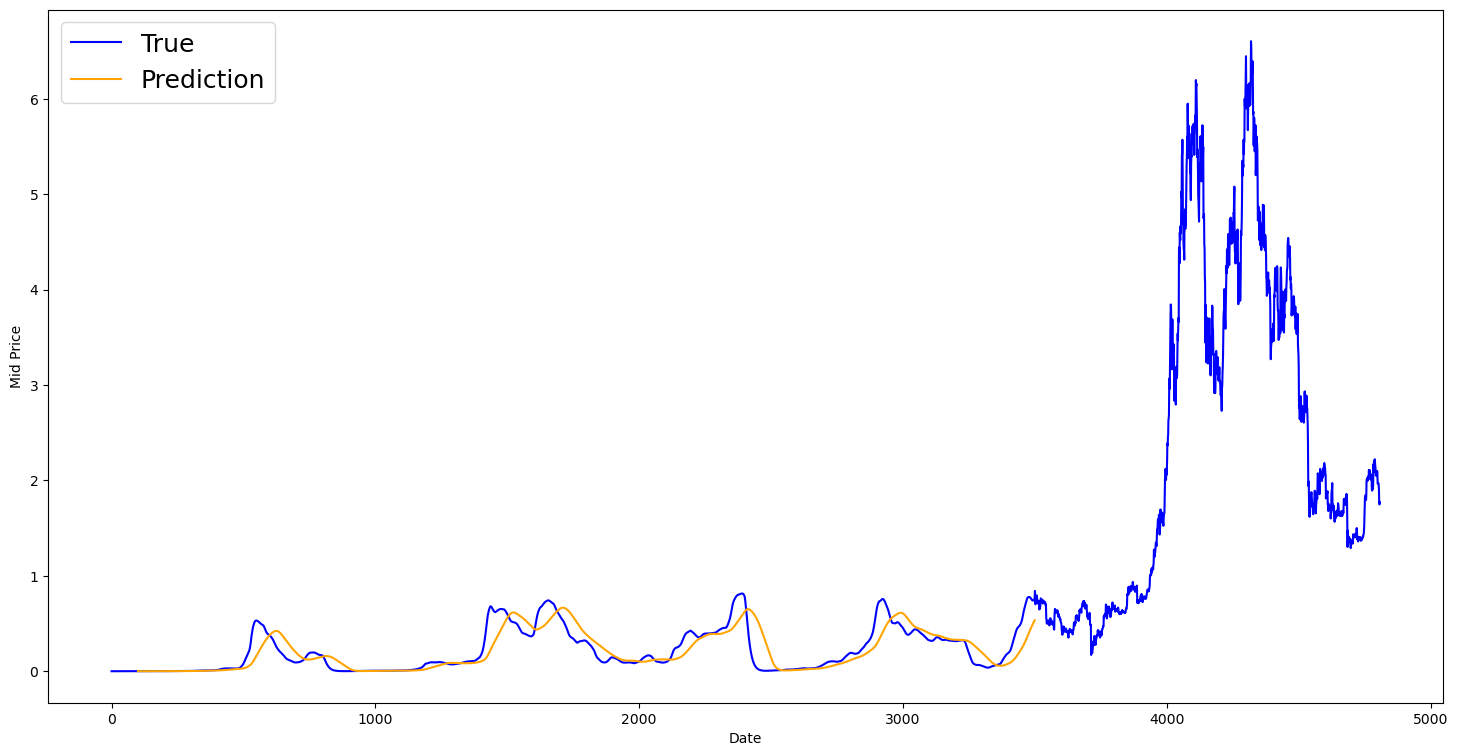

In [60]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [62]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    #run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00004


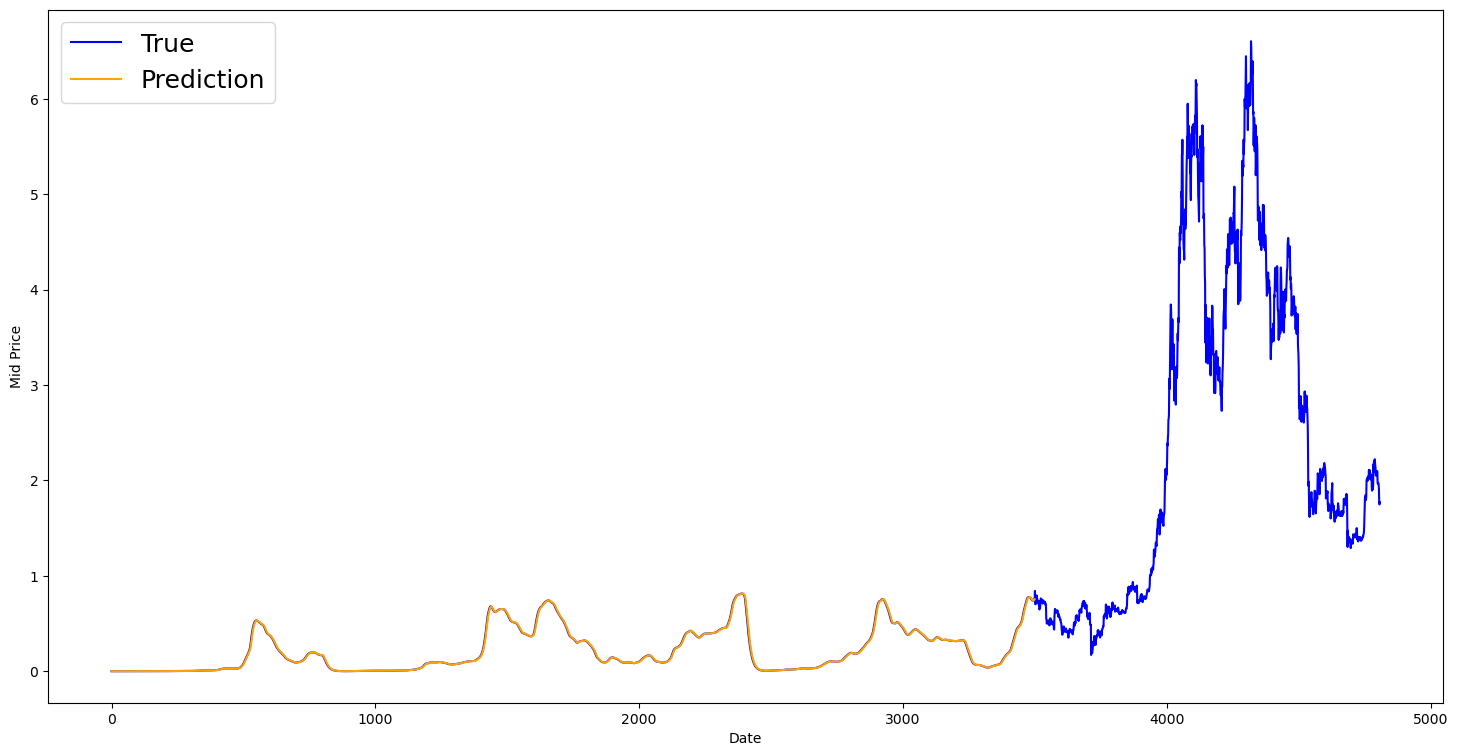

In [63]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [67]:

class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [5.0862539e-08 9.1655008e-02 1.5679614e-01 9.2762068e-02 1.8587331e-01]

	Output: [5.0862539e-08 9.2326082e-02 1.6680118e-01 9.3376771e-02 1.9041535e-01]


Unrolled index 1
	Inputs:  [1.8316595e-07 9.1707520e-02 1.6161104e-01 9.3376771e-02 1.8760273e-01]

	Output: [1.2774967e-06 9.1707520e-02 1.7866762e-01 9.4772540e-02 1.9235936e-01]


Unrolled index 2
	Inputs:  [4.3614838e-07 9.1856450e-02 1.6680118e-01 9.4064154e-02 1.8912186e-01]

	Output: [7.9579718e-07 9.2068464e-02 1.8544926e-01 9.7510986e-02 1.9235936e-01]


Unrolled index 3
	Inputs:  [7.9579718e-07 9.2068464e-02 1.7238201e-01 9.4772540e-02 1.9041535e-01]

	Output: [3.0685712e-06 9.2326082e-02 1.8544926e-01 9.8748878e-02 1.9288644e-01]


Unrolled index 4
	Inputs:  [1.2774967e-06 9.2326082e-02 1.7866762e-01 9.5577337e-02 1.9149272e-01]

	Output: [3.7253430e-06 9.3878046e-02 1.7866762e-01 9.7510986e-02 1.9280404e-01]


In [72]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times


In [73]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [76]:
from tensorflow.python.ops.rnn_cell_impl import DropoutWrapper, MultiRNNCell, LSTMCell

lstm_cells = [
    LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= xavier_initializer()
                            )
    for li in range(n_layers)]

drop_lstm_cells = [DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = MultiRNNCell(drop_lstm_cells)
multi_cell = MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'